In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from dataclasses import dataclass

In [4]:
SEED_VALUE = 42

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [5]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

print(xtrain.shape, ytrain.shape)


(50000, 32, 32, 3) (50000, 1)


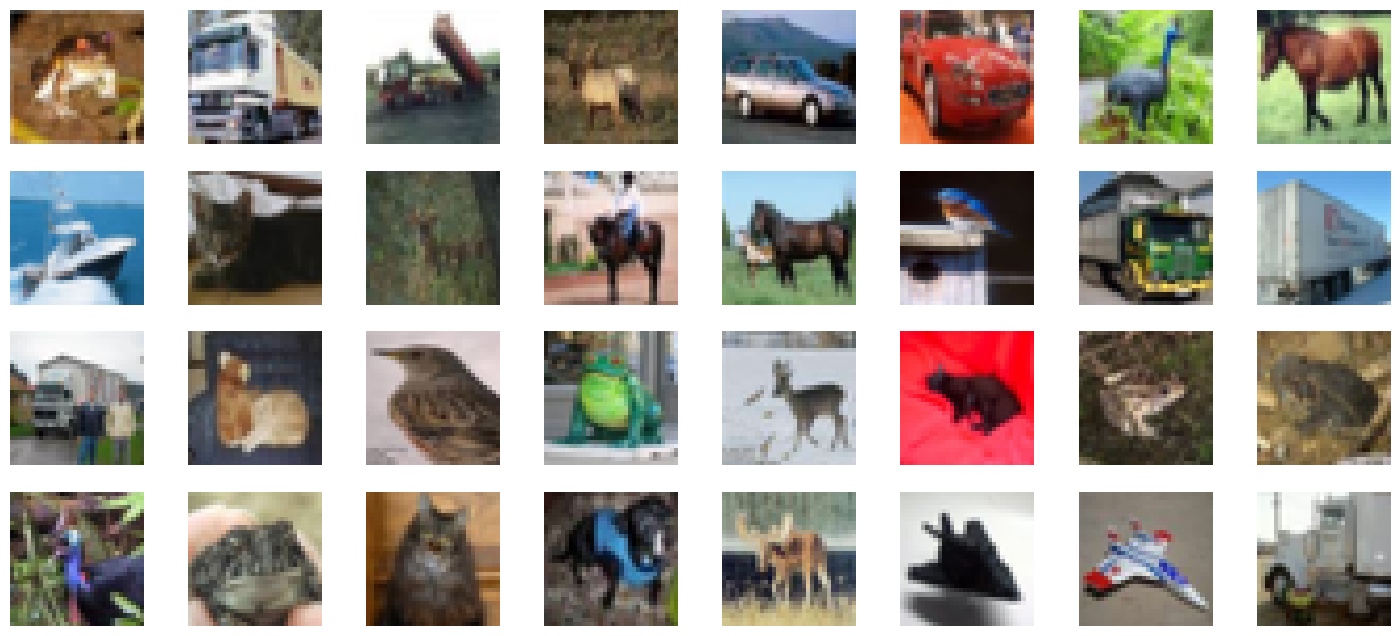

In [6]:
plt.figure(figsize=(18,8))

num_rows = 4
num_cols = 8
for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(xtrain[i])
    plt.axis('off')

In [7]:
xtrain = xtrain.astype(np.float32) / 255
xtest = xtest.astype(np.float32) / 255
print('Orignal label : ', ytrain[0])

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print('onehot label : ', ytrain[0])

Orignal label :  [6]
onehot label :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int = 10
    IMG_HEIGHT: int = 32
    IMG_WIDTH: int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int = 31
    BATCH_SIZE: int = 256
    LEARNING_RATE: float = 0.001

In [9]:
def cnn_model(input_shape=(32, 32, 3)):
    model = Sequential()
    
    # 32 
    model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.25))
    
    # 64
    model.add(Conv2D(64, 3, padding='same', activation='relu'))    
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.25))
    
    # 64
    model.add(Conv2D(64, 3, padding='same', activation='relu'))    
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(2)) 
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [10]:
model = cnn_model()
model.summary()

c:\Users\PC\Desktop\project\bootcamp\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(xtrain, ytrain,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1,
                    validation_split=.3,
)

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.2160 - loss: 2.1175 - val_accuracy: 0.3290 - val_loss: 1.8480
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.3415 - loss: 1.7936 - val_accuracy: 0.3874 - val_loss: 1.6740
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.4081 - loss: 1.6122 - val_accuracy: 0.4381 - val_loss: 1.5548
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.4539 - loss: 1.4912 - val_accuracy: 0.4763 - val_loss: 1.4517
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.4961 - loss: 1.3831 - val_accuracy: 0.5275 - val_loss: 1.3238
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.5368 - loss: 1.2886 - val_accuracy: 0.5342 - val_loss: 1.2964
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - accuracy: 0.5697 - loss: 1.1964 - val_accuracy: 0.5970 - val_loss: 1.1415
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - accuracy: 0.6007 - loss: 1

In [13]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15,4))
    
    if not (isinstance(metric_name, list)) or isinstance(metric_name, tuple):
        metrics = [metrics,]
        metric_name = [metric_name, ]
        
    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])
    
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

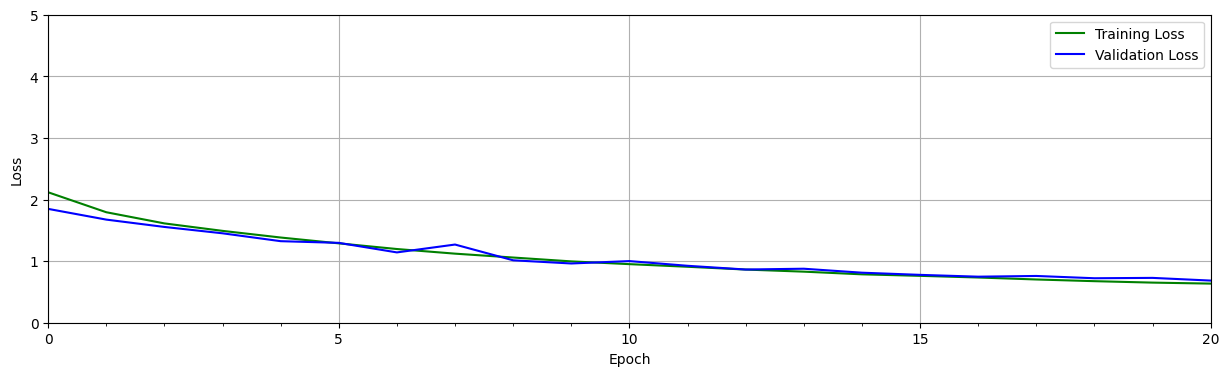

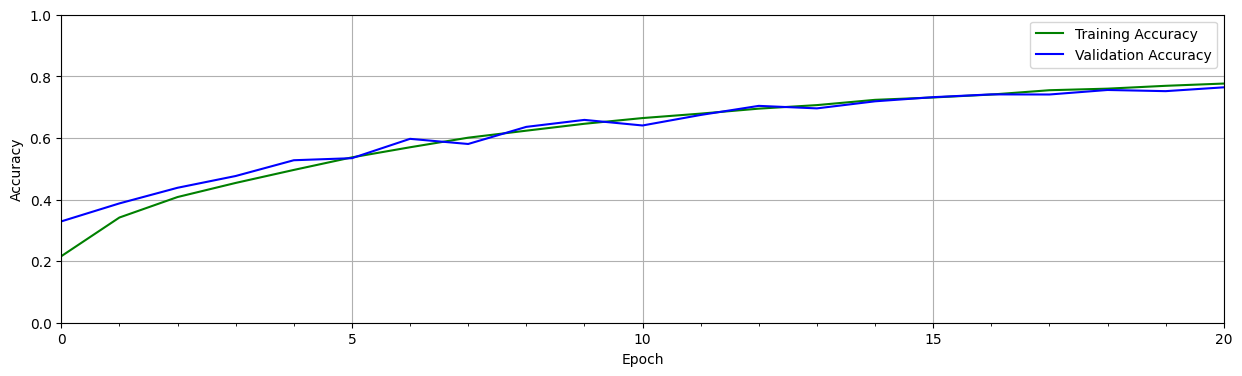

In [14]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

In [15]:
test_loss, test_acc = model.evaluate(xtest, ytest)

test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7814 - loss: 0.6623


(0.6623445153236389, 0.7814000248908997)

In [23]:
def evaluate_model(dataset, model):
    class_names = [
        'airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck'
    ]
    num_rows = 3
    num_cols = 6
    
    data_batch = dataset[0:num_rows*num_cols]
    predictions = model.predict(data_batch)
    
    plt.figure(figsize=(20,8))
    num_matches = 0
    
    for idx in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis('off')
        plt.imshow(data_batch[idx])
        
        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(ytest[idx])
        
        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize': 13, 'color': 'g' if truth_idx[0][0] == pred_idx else 'r'})
        
        if pred_idx == truth_idx:
            num_matches += 1
            
        acc = num_matches / (idx + 1)
    print('Prediction accuracy : ', int(100 * acc) / 100)
    
    return
        
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction accuracy :  0.83


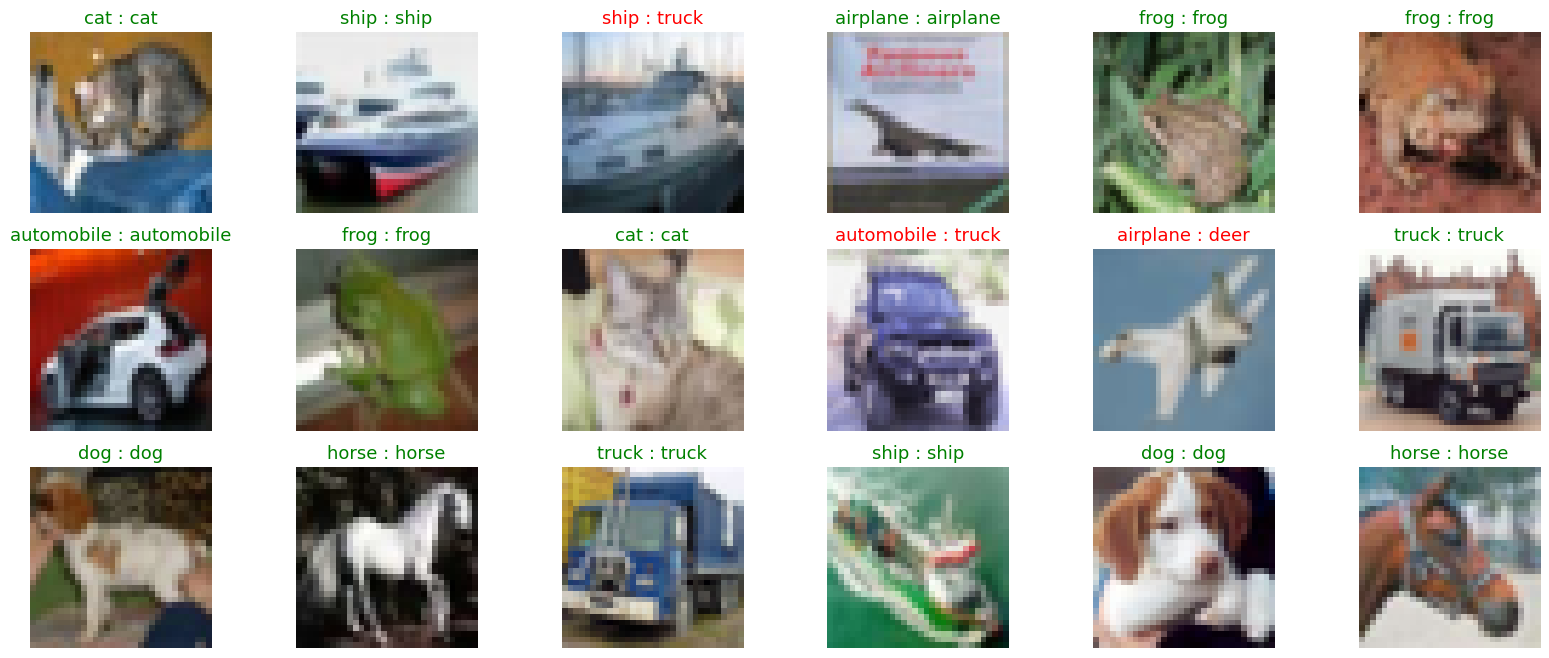

In [24]:
evaluate_model(xtest, model)

In [25]:
predictions = model.predict(xtest)

predicted_labels = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [28]:
predicted_labels

[np.int64(3),
 np.int64(8),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(6),
 np.int64(1),
 np.int64(6),
 np.int64(3),
 np.int64(9),
 np.int64(4),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(9),
 np.int64(8),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(6),
 np.int64(7),
 np.int64(2),
 np.int64(4),
 np.int64(9),
 np.int64(4),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(2),
 np.int64(6),
 np.int64(9),
 np.int64(1),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(6),
 np.int64(0),
 np.int64(9),
 np.int64(3),
 np.int64(3),
 np.int64(7),
 np.int64(6),
 np.int64(9),
 np.int64(8),
 np.int64(0),
 np.int64(3),
 np.int64(8),
 np.int64(8),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(7),
 np.int64(5),
 np.int64(6),
 np.int64(3),
 np.int64(6),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(7),
 np.int64(0),
 np.in

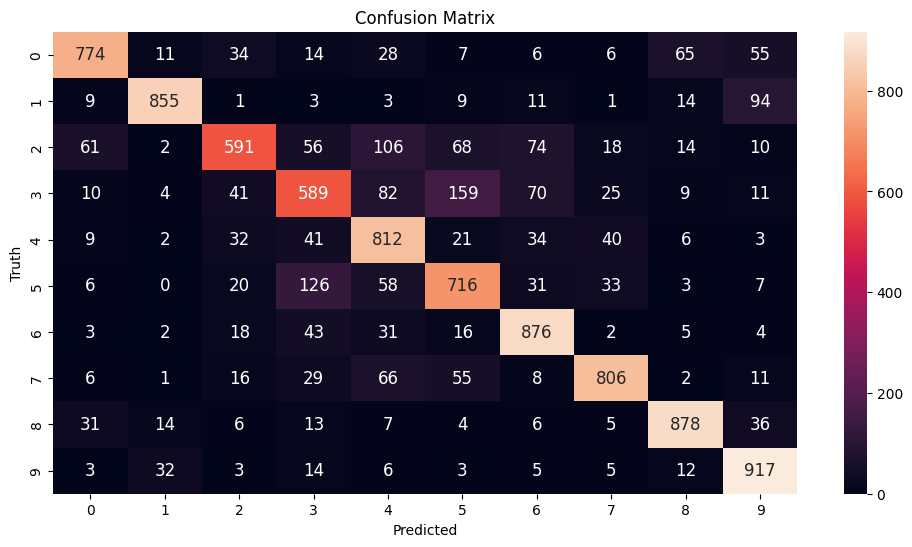

In [31]:
y_test_integer_labels = tf.argmax(ytest, axis=1)

cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

plt.figure(figsize=(12, 6))
import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [32]:
loss, acc = model.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7814 - loss: 0.6623


In [33]:
acc

0.7814000248908997